# Random Forests

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlenidirilmseine dayanır.


Ağaçlar için gözlemler bootstrap rastgele örnek seçimi yöntemiyle, değişknler random subspace yöntemşyle seçilir
her düğüm noktasında rastgele değişken seöimi yapılır.

Yani değişkenler seiçilirken rastgele seçilir ki rassallık bozulmasın yapısını korusun. Ancak Tahminleri toplarken herkesten aldığı tahminleri eşit şekilde değrlendirmiyor. 
En başarılı ağacı en çok kayda alıyor :)

In [53]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [54]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

# Model

In [55]:
from sklearn.ensemble import RandomForestRegressor


In [56]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

# Tahmin

In [67]:
np.sqrt(mean_squared_error(y_test,rf.predict(X_test)))

344.8191624908484

# Tuning


In [58]:
params={"max_depth":list(range(1,10)),
        "max_features":[3,5,10,15],
        "n_estimators":[150,200,250,300]}#ağaç sayısı en iyi 1000 ve 500 olduğu soylenir

In [59]:
rf_model=RandomForestRegressor(random_state=42)

In [60]:
rf_cv_model=GridSearchCV(rf_model, params, cv=10,n_jobs=-1 )
#ilk kez n_jobs paremetresini girdik. Çünkü burada paremetre çok ve kuöak uzun sürer n_jabs=-1 yapınca işlemciler tam performans olarak çalışır

In [61]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [150, 200, 250, 300]})

In [62]:
rf_cv_model.best_estimator_

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=150,
                      random_state=42)

In [66]:
#Yeni modeli kuruyoeuz verilen paremetrelerle
rf_final=RandomForestRegressor(max_depth=8,
                              max_features=3,
                              n_estimators=150,
                              random_state=42).fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,rf_final.predict(X_test)))

345.77465022133583

In [68]:
#baggin ile random forests arasında bir ilişki vardır seçilecek(göz önünde bulundurulacak değişken) sayısını normal değişken
#değişken sayımıza eşitlersek bagging yapmış oluruz

In [69]:
#şimdi buraya kadar modeli tune ettik aslonda bitti ama birde değişkenlerin bağımlı değişkene etkisine bakalım


In [79]:
importance=pd.DataFrame({"importance":rf_final.feature_importances_*100},
                        index=X_train.columns)
                        

Text(0.5, 0, 'değişknelerin önem sirasi')

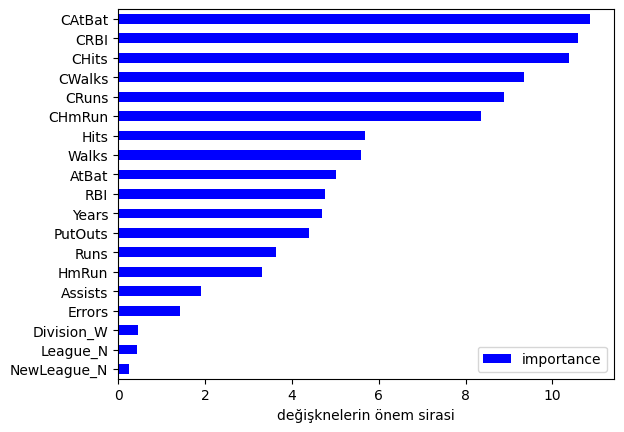

In [80]:
importance.sort_values(by="importance",
                        axis=0,
                        ascending=True).plot(kind="barh",color="blue")
plt.xlabel("değişknelerin önem sirasi")